# Experimentation of training of an After State Player other types of players

# 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [1]:
%matplotlib inline
import random as rd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.AfterStatePlayer import ASPlayer
from tic_tac_toe.AfSt import ASPlayer2
from tic_tac_toe.SymmetricTabularQPlayer import SYMTQPlayer
from tic_tac_toe.SymmetricAfterStatePlayer import SYM_ASPlayer
from tic_tac_toe.AfterStateTabularQPlayer import TQ_ASPlayer


from util import battle

## 2. Experiment of learning of $TD(0)$ AS Players while playing with other players

### 2.1. Let define a new function experiment

This particular function takes as parameters 2 players and calculates the average performance of each player for 10 series of 10 battles where each battle has by default 100 games and plot the average outcomes using the errorbar function.

In [2]:
def experiments(p1: Player, p2: Player, num_battles = 100, num_games_train = 10, series =10, 
                num_games_eval = 100,loc='best'):
    s_p1win = []
    s_p2win = []
    s_draw = []
    global play1
    global play2
    
    for k in range(series):
        
        p1_wins = []
        p2_wins = []
        draws = []
        count = []    

        for i in range(num_battles):
            p1win, p2win, draw = battle(p1, p2, num_games_train,num_games_eval, True)
            p1_wins.append(p1win)
            p2_wins.append(p2win)
            draws.append(draw)
            
        s_p1win.append(p1_wins)
        s_p2win.append(p2_wins)
        s_draw.append(draws)
        
    data_p1 = np.average(np.array(s_p1win), axis = 0)
    std_p1 = np.std(np.array(s_p1win), axis=0)
    
    data_p2 = np.average(np.array(s_p2win), axis = 0)
    std_p2 = np.std(np.array(s_p2win), axis=0)
    
    data_draw = np.average(np.array(s_draw), axis = 0)
    std_draw = np.std(np.array(s_draw), axis=0)
    
    x = np.arange(num_battles)    
    
    plt.title('Agents Evalution ')
    plt.ylabel('Battle outcomes')
    plt.xlabel('Battles')
    plt.errorbar(x, data_draw, yerr=std_draw,  label='Mean Draw')
    plt.errorbar(x,data_p1, yerr=std_p1, label='Mean {} wins'.format(play1))
    plt.errorbar(x,data_p2, yerr=std_p2, label='Mean {} wins'.format(play2))
    plt.legend( shadow=True, fancybox=True, framealpha =0.7)

# 3. When they are coming second against the Random Player/ Minmax Player

## 3.1. Experiment of training against the Random Player for the AS Player and TQ Player

### 3.1.1. The After State Player

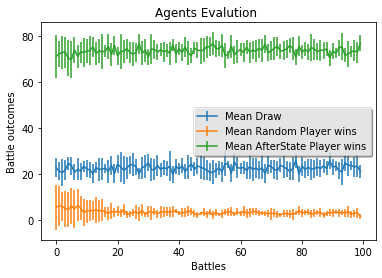

In [18]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer(gamma = 1)
play1 = 'Random Player'
play2 = 'AfterState Player'
experiments(Rdlayer, AsPlayer,num_games_train = 100)

Let see with a different discount factor $\gamma = 0.8$

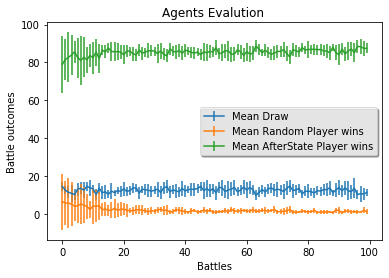

In [19]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer(gamma = 0.8)
play1 = 'Random Player'
play2 = 'AfterState Player'
experiments(Rdlayer, AsPlayer,num_games_train = 100)

The number of wins of the After state is improved with discount factor $\gamma = 0.8$

### 3.1.2. The symmetric After State Player

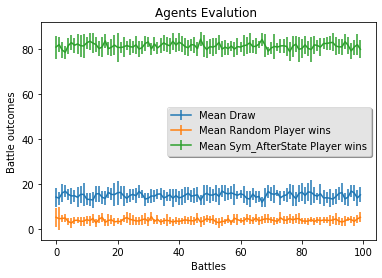

In [20]:
Rdlayer = RandomPlayer()
AsPlayer = SYM_ASPlayer(gamma = 1)
play1 = 'Random Player'
play2 = 'Sym_AfterState Player'
experiments(Rdlayer,AsPlayer,num_games_train = 100 )

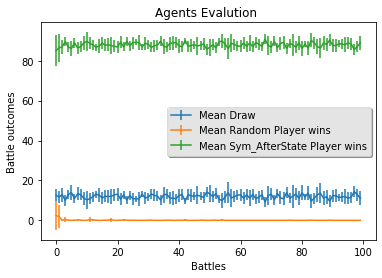

In [21]:
Rdlayer = RandomPlayer()
AsPlayer = SYM_ASPlayer(gamma = 0.8)
play1 = 'Random Player'
play2 = 'Sym_AfterState Player'
experiments(Rdlayer,AsPlayer,num_games_train = 100 )

The symmetric after state player is much better than the $TD(0)$ After state player. And it is much better with a discount factor $\gamma = 0.8$

### 3.1.3. The Tabular Q Player

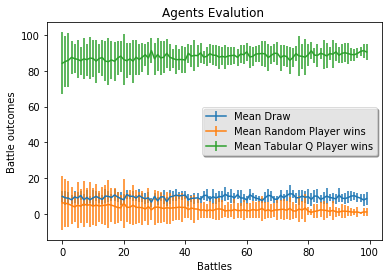

In [22]:
Rdlayer = RandomPlayer()
TsPlayer = TQPlayer()
play1 = 'Random Player'
play2 = 'Tabular Q Player'
experiments(Rdlayer, TsPlayer,num_games_train = 100)

We can see that the Tabular Q Player is slower than the $TD(0)$ after state player and obviously than the Symmetric $TD(0)$ After State Player. However, it continues to improve its strategy after 100 battles. We need more runs to see what would happen next.

## 3.2. Experiment of training against the Minmax Player for the AS Player and TQ Player

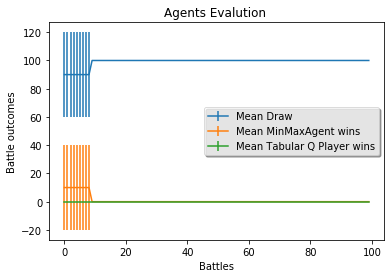

In [15]:
MinMax = MinMaxAgent()
TsPlayer = TQPlayer()
play1 = 'MinMaxAgent'
play2 = 'Tabular Q Player'
experiments(MinMax, TsPlayer)

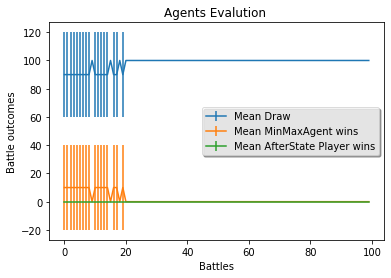

In [12]:
MinMax = MinMaxAgent()
AsPlayer = ASPlayer(gamma = 0.8)
play1 = 'MinMaxAgent'
play2 = 'AfterState Player'
experiments(MinMax, AsPlayer)

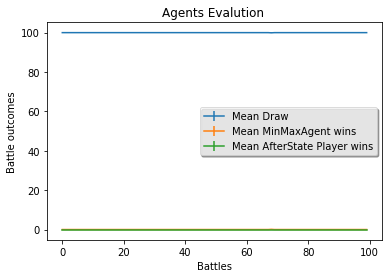

In [13]:
MinMax = MinMaxAgent()
AsPlayer = ASPlayer(gamma = 1)
play1 = 'MinMaxAgent'
play2 = 'AfterState Player'
experiments(MinMax, AsPlayer)

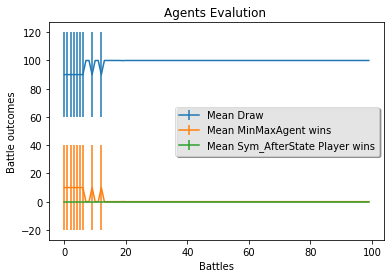

In [14]:
MinMax = MinMaxAgent()
AsPlayer = SYM_ASPlayer(gamma = 0.8)
play1 = 'MinMaxAgent'
play2 = 'Sym_AfterState Player'
experiments(MinMax,AsPlayer )

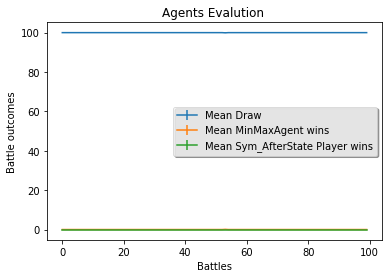

In [10]:
MinMax = MinMaxAgent()
AsPlayer = SYM_ASPlayer(gamma = 1)
play1 = 'MinMaxAgent'
play2 = 'Sym_AfterState Player'
experiments(MinMax,AsPlayer )

### 3.2.1. Remark

We can notice that the performance of the After State Players is much better than the TQ Player with the discount $\gamma = 0.8$, otherwise the TQ player seems to perform better.

# 4. When they are going first against the Random Player/ Minmax Player

## 4.1. Experiment of training against the Random Player for the AS Player and TQ Player

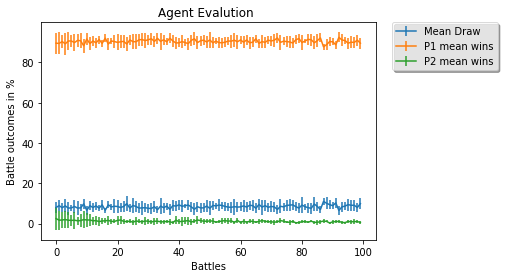

In [8]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer()
experiments(AsPlayer, Rdlayer)

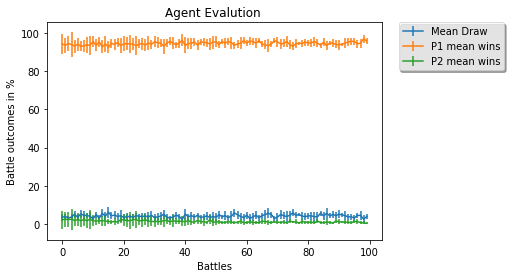

In [10]:
Rdlayer = RandomPlayer()
AsPlayer = AS_symPlayer()
experiments(AsPlayer, Rdlayer)

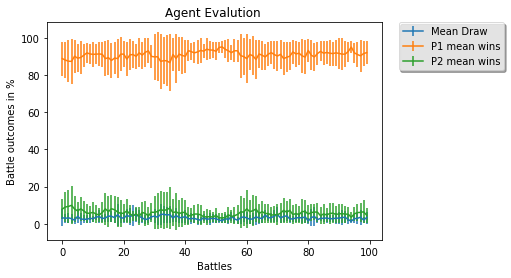

In [9]:
Rdlayer = RandomPlayer()
TsPlayer = TQPlayer()
experiments(TsPlayer, Rdlayer)

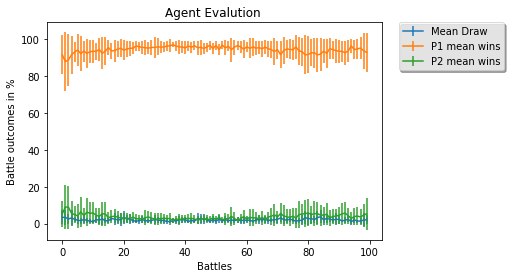

In [11]:
Rdlayer = RandomPlayer()
TsPlayer = TQ_ASPlayer()
experiments(TsPlayer, Rdlayer)

We notice the same thing as above. the symmetric After_State Player is performing better than all other Players

## 4.2. Experiment with the MinMax

### 4.2. When they are going first

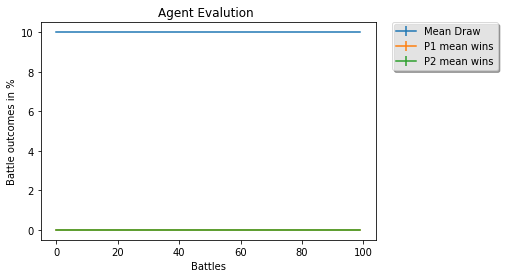

In [18]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
experiments(AsPlayer, MinMaxplayer)

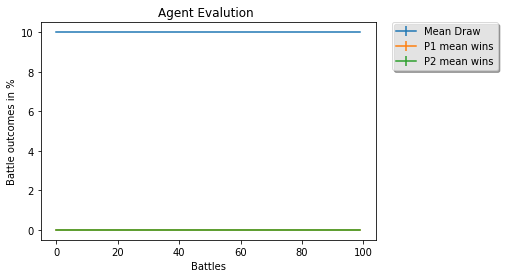

In [20]:
MinMaxplayer = MinMaxAgent()
SymAsPlayer = SYM_ASPlayer()
experiments(SymAsPlayer, MinMaxplayer)

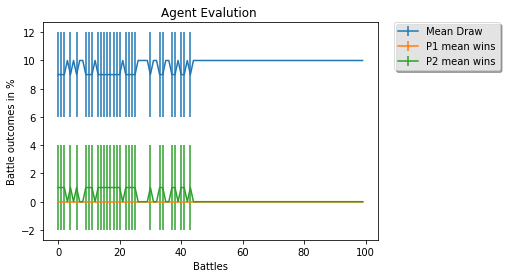

In [21]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQPlayer()
experiments(TqPlayer, MinMaxplayer)

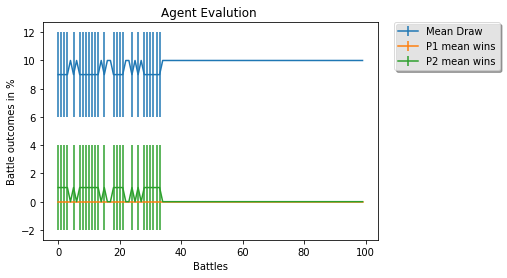

In [22]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(TqPlayer, MinMaxplayer)

# 5. Conclusion

The AS Player we implement has shown that it is faster than the TQ Player when it comes to training with other kinds of players.

However, it has shown that it is not a good trainer for itself if it comes to be evaluated with other players. With itself, it's reaching optimality very fast but it stays still beatable by other players.